### Exponential Weighted Moving Average (EWMA)

In [7]:
import pandas as pd
import numpy as np
import math
import os

In [14]:
# loading datasets
data_path = '../data'
close_data = pd.read_pickle(os.path.join(data_path, 'close_data_minute.pkl'))
return_data_daily = pd.read_pickle(os.path.join(data_path, 'return_data_daily.pkl'))

In [15]:
# Exponential Weighted Moving Average (EWMA) Volatility
def calculate_EWMA_vol(return_data, initial_var, lambda_=0.9):
  '''
  Calculate EWMA volatility
  :param return_data: daily return
  :param initial_var: initial variance, var_0
  '''

  # initialise ouput
  var = pd.DataFrame(index=return_data.index, columns=return_data.columns)

  var.iloc[0] = initial_var
  
  for row_i in range(1, return_data.shape[0]):
    var.iloc[row_i] = (1-lambda_)*(return_data.iloc[row_i] - return_data.iloc[row_i].mean())**2 + lambda_*var.iloc[row_i-1]

  return var.map(math.sqrt)

In [16]:
initial_var = close_data.groupby(pd.Grouper('D')).apply(lambda x: x.var()).iloc[0]
ewma_vol = calculate_EWMA_vol(return_data_daily, initial_var)

C:\Users\Betty\AppData\Local\Temp\ipykernel_15028\1713305681.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  initial_var = close_data.groupby(pd.Grouper('D')).apply(lambda x: x.var()).iloc[0]


### Analysis

In [20]:
all_data = pd.read_pickle(os.path.join(data_path, 'all_data.pkl'))

In [21]:
# stack data to match the format of the function
ewma_vol_stacked = ewma_vol.stack().reset_index()
ewma_vol_stacked.columns = ['Date', 'Ticker', 'ewma_vol']
ewma_vol_stacked

,Date,Ticker,ewma_vol
0,2022-01-03,AAPL,12.752164
1,2022-01-03,NVDA,54.873644
2,2022-01-03,MSFT,28.148061
3,2022-01-03,AMZN,1450.639160
4,2022-01-03,META,71.300871
...,...,...,...
530219,2024-12-06,WBA,0.017582
530220,2024-12-06,QRVO,0.012205
530221,2024-12-06,PARA,0.016607
530222,2024-12-06,FOX,0.010299


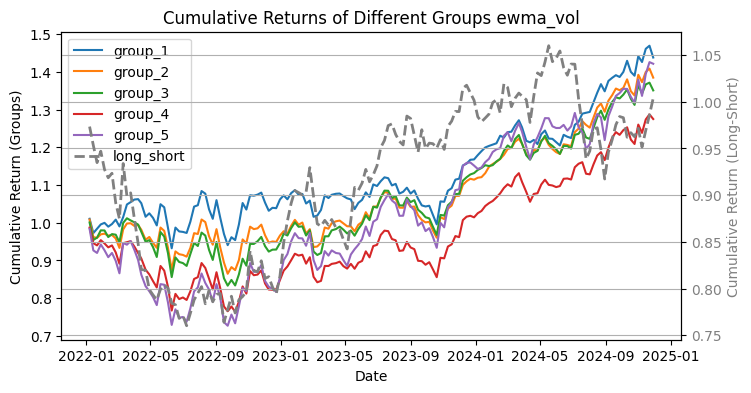


=== Backtesting statistical metrics ===
transaction_cost: 0.00%(single side)
Annualized return:
group_1       0.1316
group_2       0.1197
group_3       0.1133
group_4       0.0962
group_5       0.1422
long_short    0.0106
dtype: float64

Annualized volatility:
group_1       0.1488
group_2       0.1530
group_3       0.1648
group_4       0.1774
group_5       0.2269
long_short    0.1371
dtype: float64

Sharpe ratio:
group_1       0.8844
group_2       0.7824
group_3       0.6875
group_4       0.5423
group_5       0.6267
long_short    0.0773
dtype: float64

max drawback:
group_1      -0.1323
group_2      -0.1427
group_3      -0.1766
group_4      -0.2260
group_5      -0.2614
long_short   -0.2191
dtype: float64


,group_1,group_2,group_3,group_4,group_5,long_short
2022-01-07,1.010471,1.008326,1.000715,0.986958,0.983898,0.973428
2022-01-14,0.972514,0.961946,0.954135,0.945813,0.926668,0.953371
2022-01-21,0.984192,0.959860,0.960477,0.939850,0.919789,0.934847
2022-01-28,0.995527,0.969107,0.979750,0.953793,0.942374,0.947034
2022-02-04,0.999692,0.970942,0.979475,0.945045,0.926871,0.927492
...,...,...,...,...,...,...
2024-11-01,1.441837,1.392465,1.365538,1.260335,1.379839,0.971584
2024-11-08,1.426350,1.372946,1.342196,1.238372,1.336457,0.951473
2024-11-15,1.461392,1.399918,1.367074,1.274017,1.394438,0.969377
2024-11-22,1.469596,1.408955,1.371569,1.287410,1.426074,0.985928


In [22]:
import util
merged_data = util.df_factor_merge(all_data, ewma_vol_stacked, 'ewma_vol')
util.group_backtest(merged_data, 'ewma_vol')

c:\Users\Betty\anaconda3\Lib\site-packages\alphalens\utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
c:\Users\Betty\anaconda3\Lib\site-packages\alphalens\utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
c:\Users\Betty\anaconda3\Lib\site-packages\alphalens\utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not f

Dropped 1.2% entries from factor data: 1.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 40.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,8.584715e-14,4.177152,0.053166,0.267805,105787,20.146374
2,4.691174e-03,7.944309,0.116857,0.577830,104841,19.966215
3,5.618268e-03,14.130925,0.208258,1.056681,104782,19.954979
4,6.627863e-03,26.013025,0.373222,1.912944,104841,19.966215
5,8.295849e-03,1450.639160,1.834305,22.184920,104841,19.966215


Returns Analysis


,1D,5D,10D
Ann. alpha,-0.010,-0.032,-0.034
beta,0.256,0.240,0.272
Mean Period Wise Return Top Quantile (bps),-0.129,-0.332,-0.294
Mean Period Wise Return Bottom Quantile (bps),0.600,0.803,0.729
Mean Period Wise Spread (bps),-0.729,-1.184,-1.078


<Figure size 640x480 with 0 Axes>

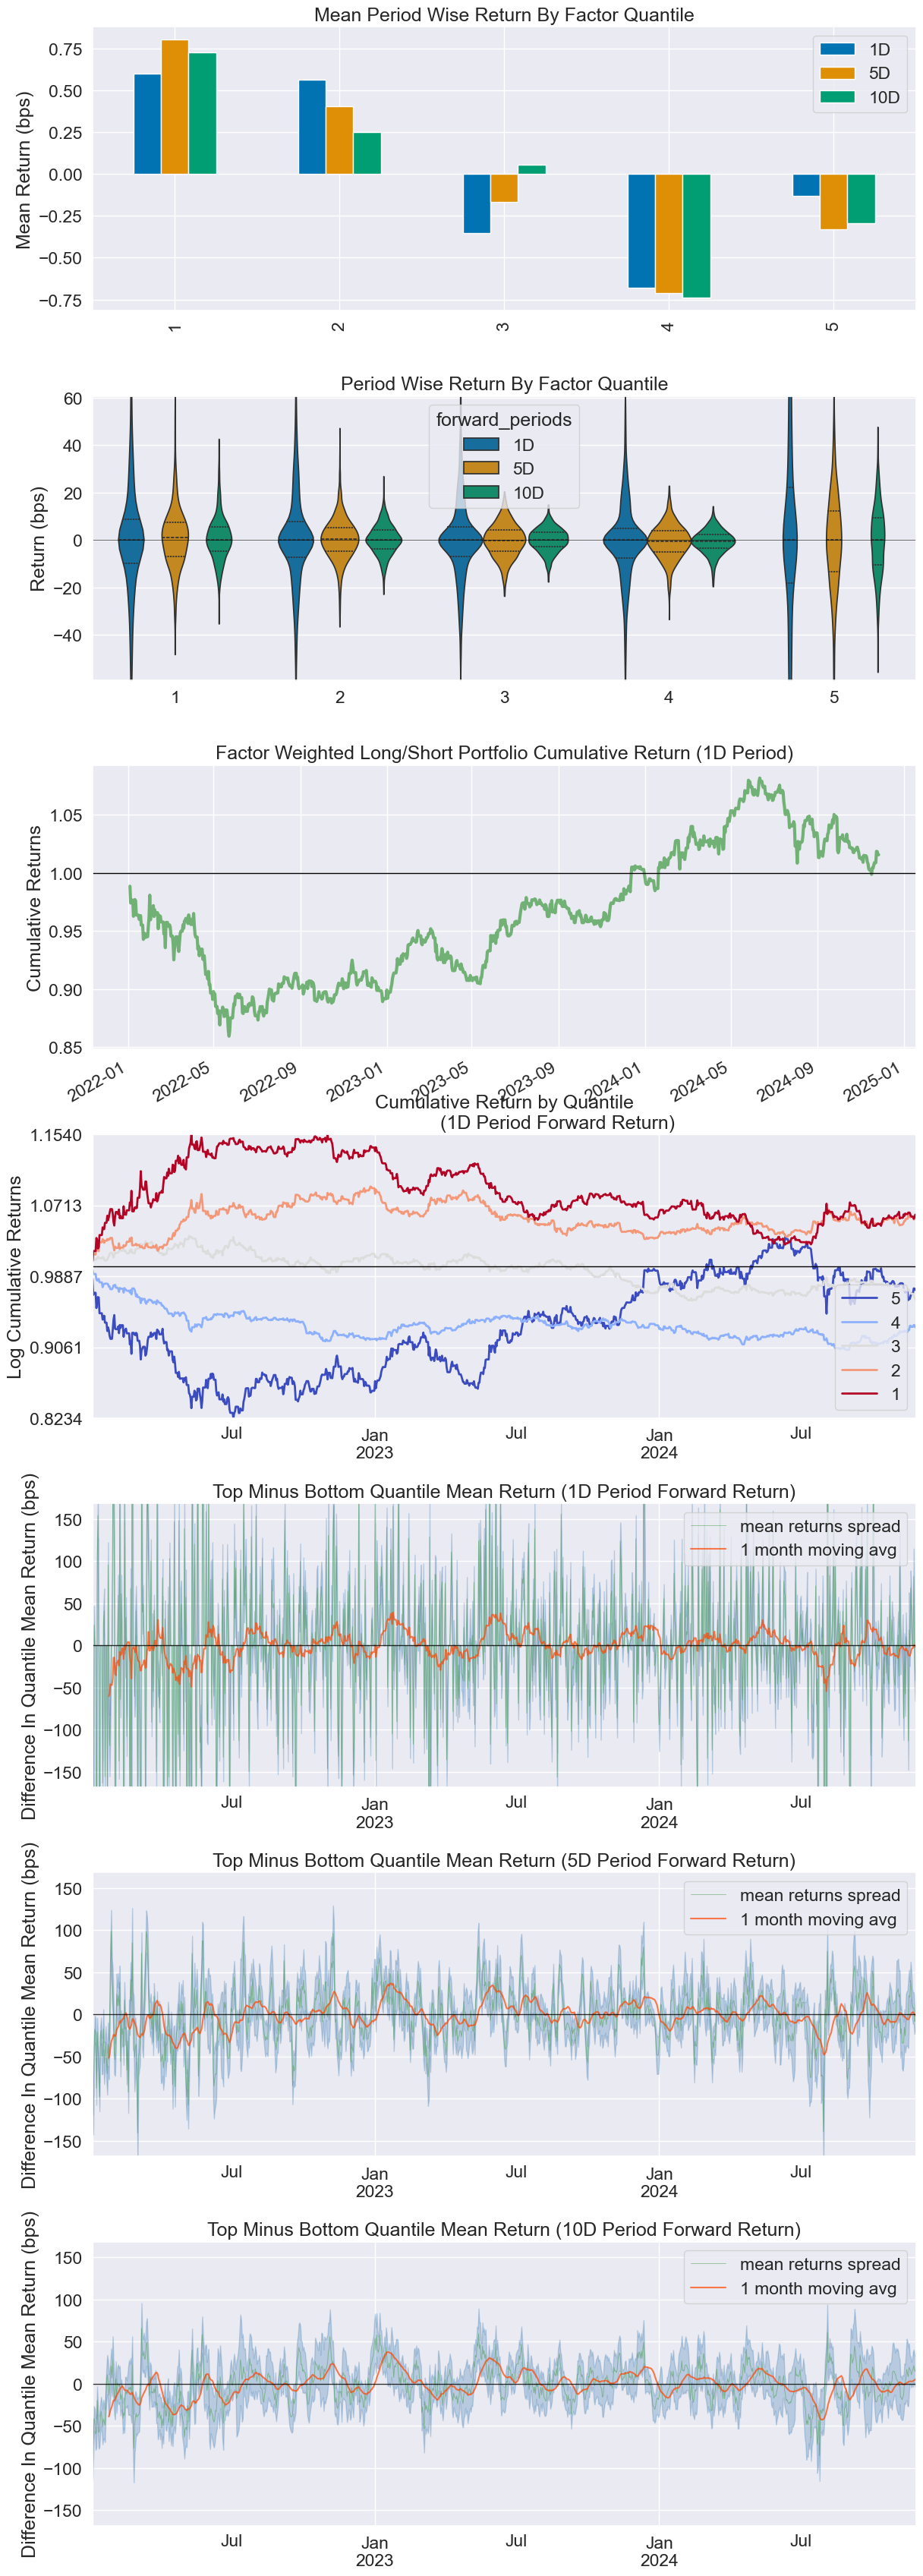

c:\Users\Betty\anaconda3\Lib\site-packages\alphalens\performance.py:57: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  lambda x: stats.spearmanr(x, f)[0]


Information Analysis


,1D,5D,10D
IC Mean,-0.006,-0.012,-0.016
IC Std.,0.168,0.159,0.159
Risk-Adjusted IC,-0.036,-0.073,-0.099
t-stat(IC),NaN,-2.379,-3.220
p-value(IC),NaN,0.018,0.001
IC Skew,NaN,-0.097,-0.179
IC Kurtosis,NaN,-0.172,-0.223


c:\Users\Betty\anaconda3\Lib\site-packages\alphalens\performance.py:57: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  lambda x: stats.spearmanr(x, f)[0]
c:\Users\Betty\anaconda3\Lib\site-packages\alphalens\performance.py:118: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouper.append(pd.Grouper(freq=by_time))


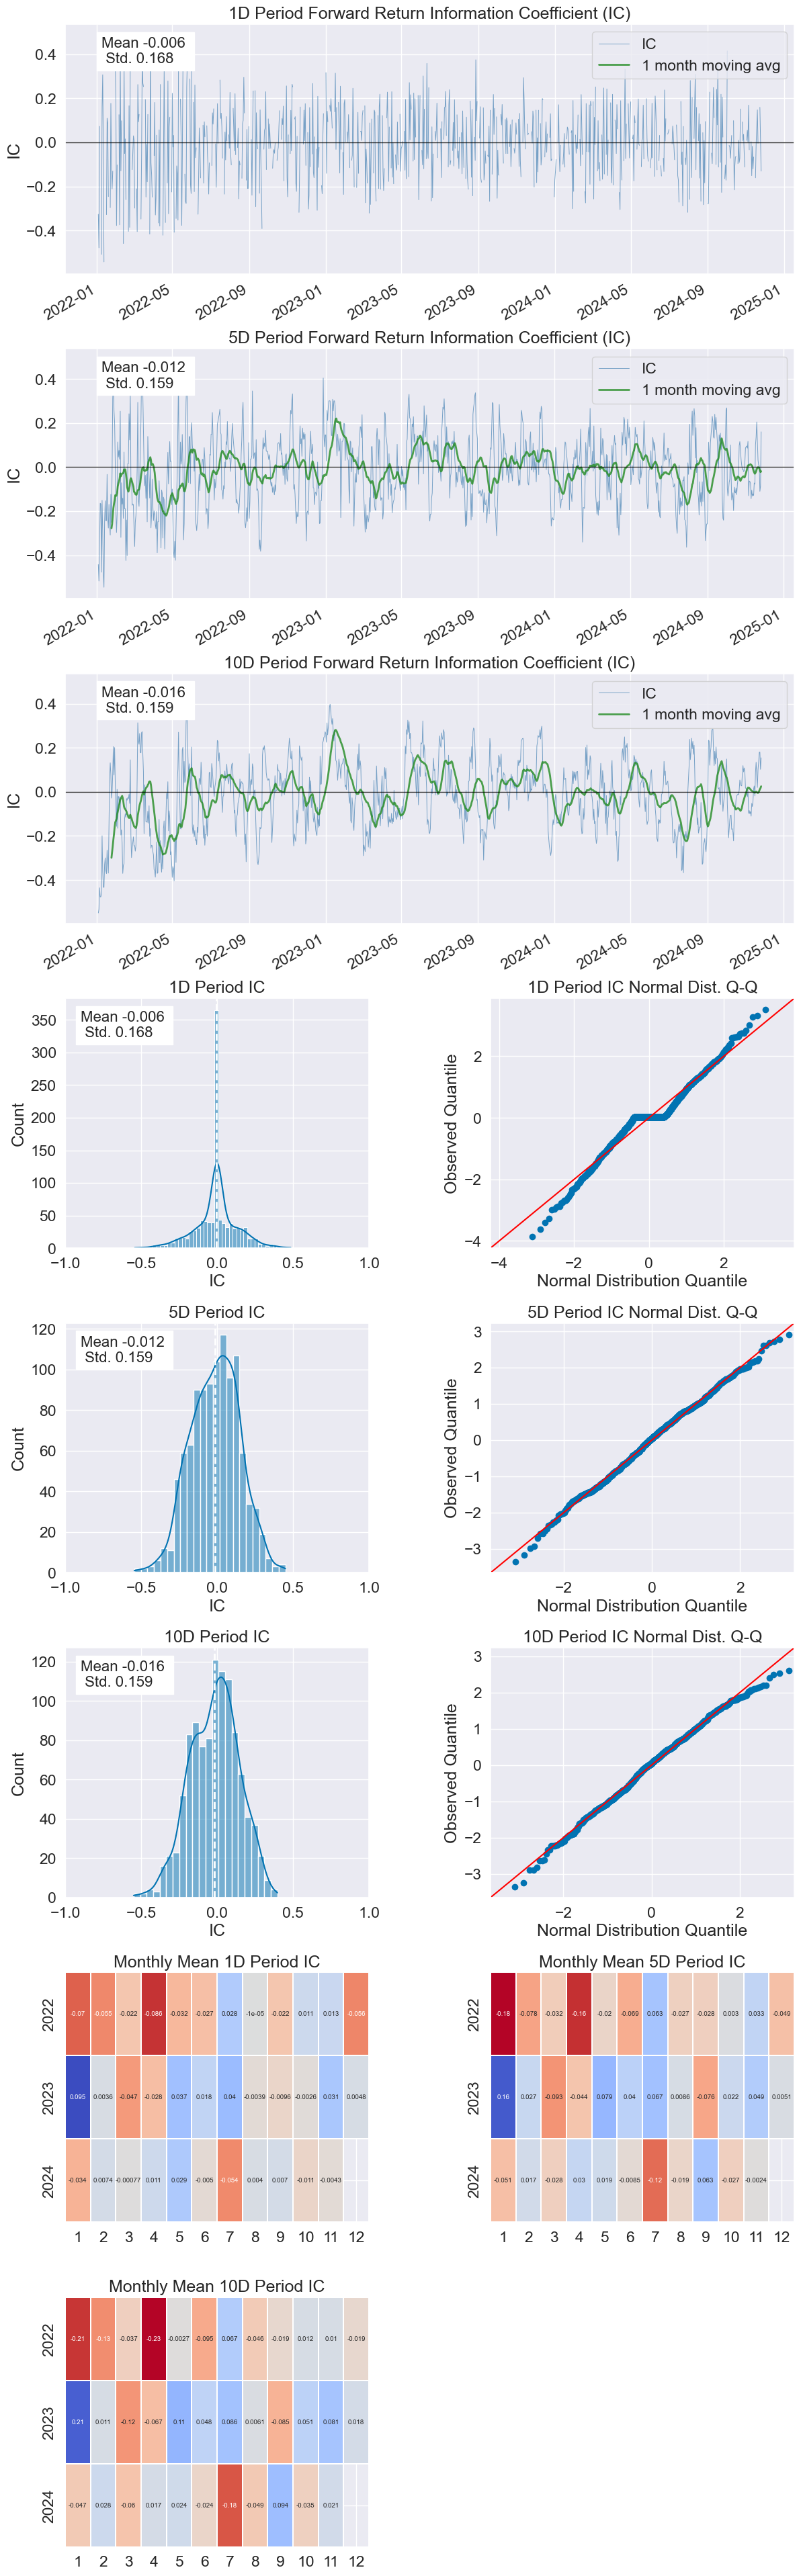

c:\Users\Betty\anaconda3\Lib\site-packages\alphalens\utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.098,0.283,0.392
Quantile 2 Mean Turnover,0.199,0.518,0.616
Quantile 3 Mean Turnover,0.209,0.543,0.636
Quantile 4 Mean Turnover,0.169,0.473,0.590
Quantile 5 Mean Turnover,0.074,0.228,0.324


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.967,0.851,0.739


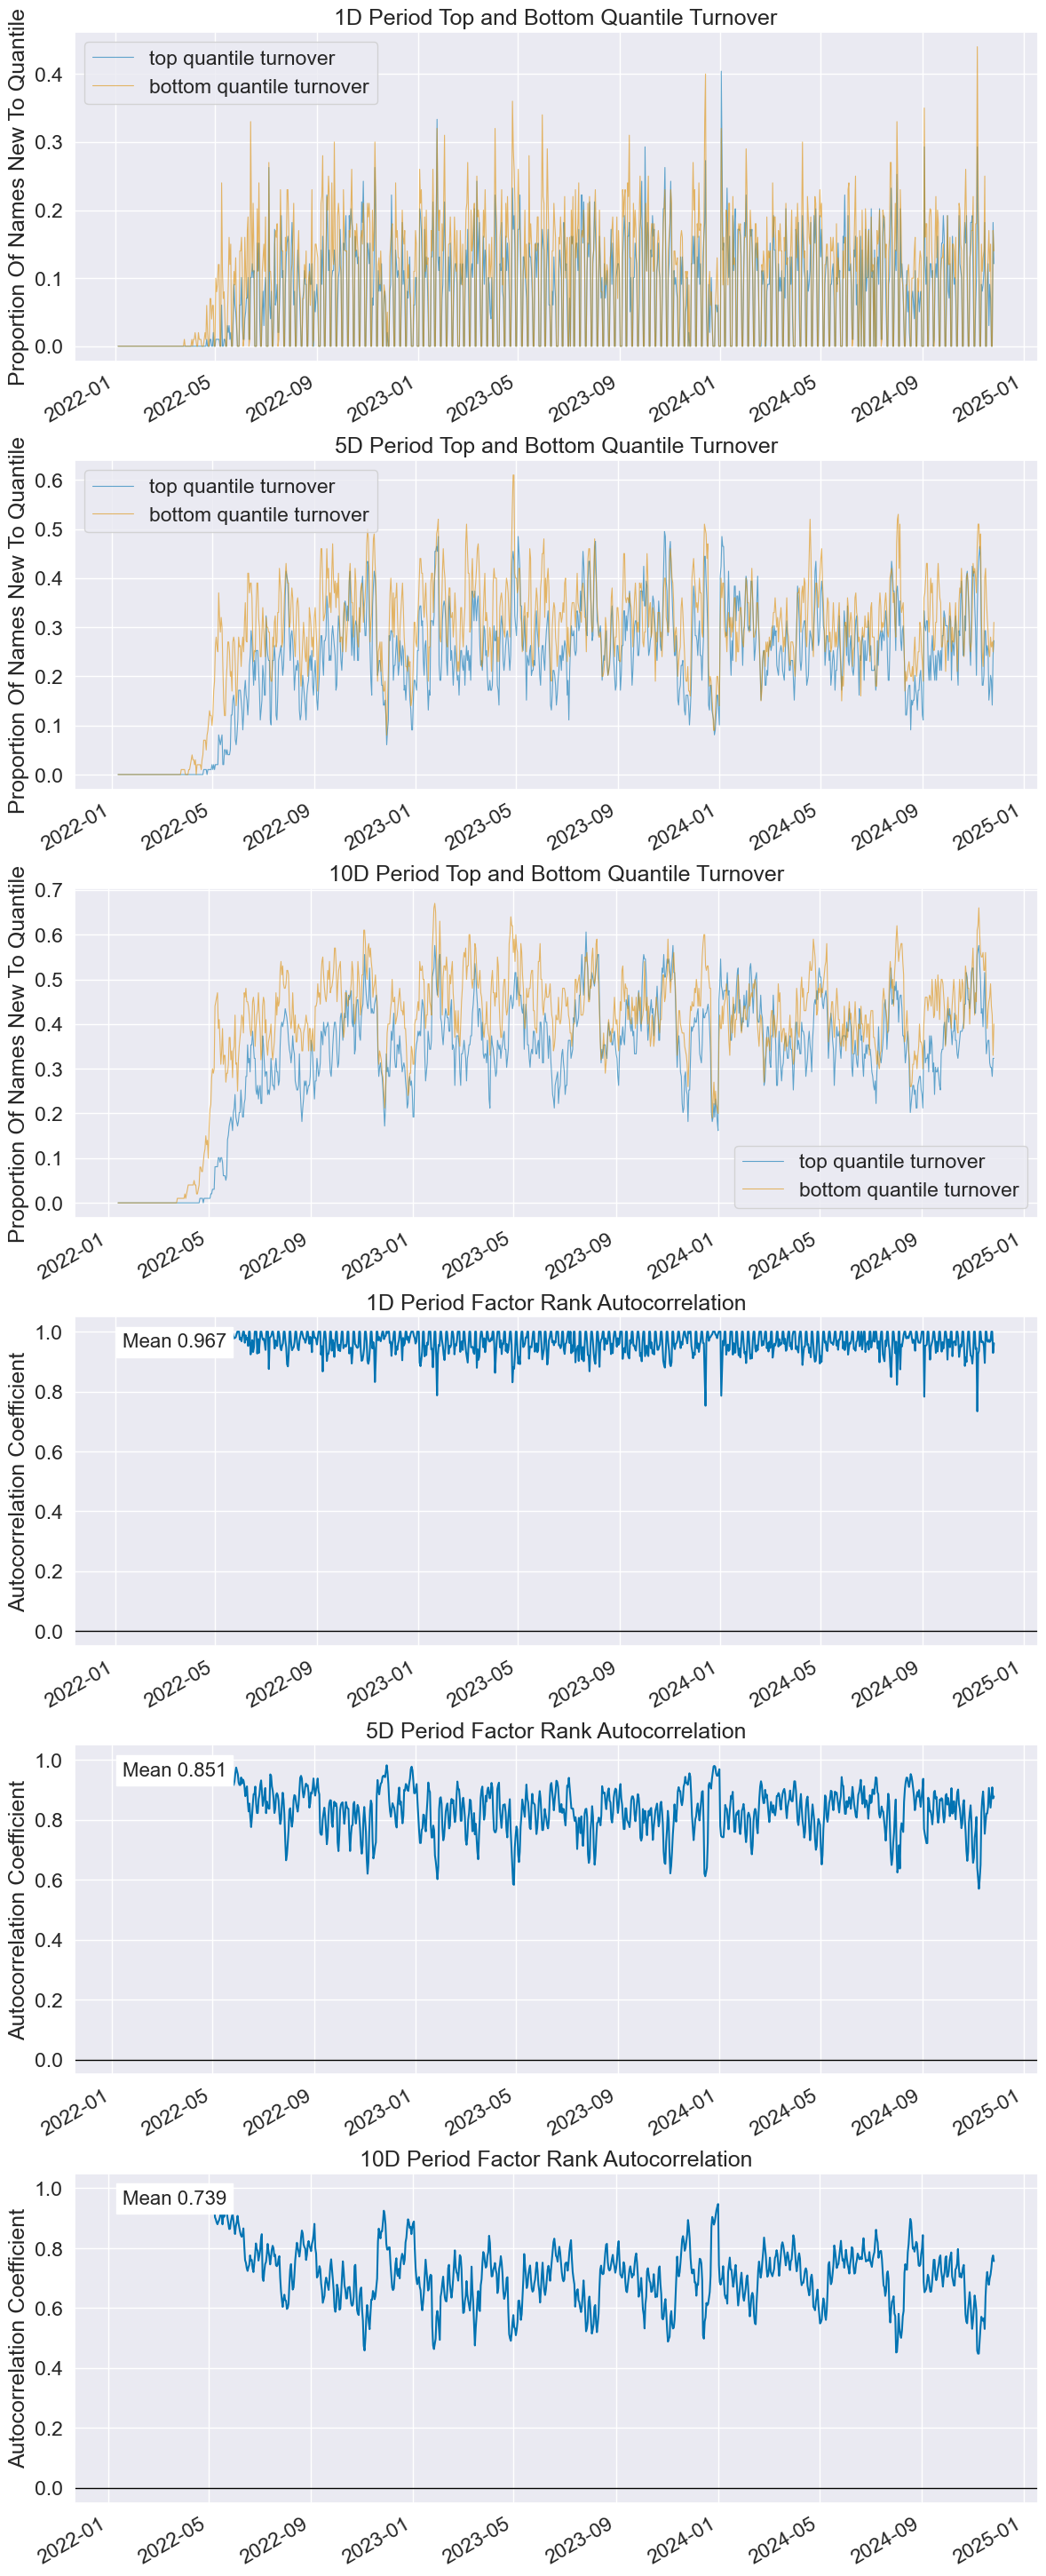

In [27]:
open_data_daily = pd.read_pickle(os.path.join(data_path, 'open_data_daily.pkl'))
util.create_factor_graphs(ewma_vol, open_data_daily, quantiles=5)